# Code Setup
This includes connecting to the Google Drive and importing Python libraries and various other tools

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np7
from numpy import sqrt
from numpy import argmax
import pandas as pd
from collections import Counter

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
import matplotlib.pyplot as plt
from keras import initializers
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras import backend as K
import keras
from keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Data Preparation
Preparing the data to be used in the model. This includes separating inputs and designated outputs, and splitting the dataset into training, validation, and testing sets.

In [41]:
# Read from the dataset and save the pandas file to "dataset"
dataset = pd.read_csv('/content/drive/MyDrive/PulsarStarsClassifier/pulsar_data_train.csv')

# Remove all rows with null values
print(type(dataset))
dataset.dropna(inplace=True)

# X is the data we are inputting into the model, Y is the classified result of the corresponding X
X = dataset.iloc[:, [0,1,2,3,4,5,6,7,]].values
y = dataset.iloc[:, 8].values

<class 'pandas.core.frame.DataFrame'>


In [42]:
# Pre-set ratios for splitting the dataset into training, validation, and testing
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Randomly dividing the dataset and assigning them to the corresponding sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

# Showing the length of each set, as well as how many "detected stars" there are
print("Training: " + str(len(x_train)) + " " + str(Counter(y_train)))
print("Validation: " + str(len(x_val)) + " " + str(Counter(y_val)))
print("Testing: " + str(len(x_test)) + " " + str(Counter(y_test)))

Training: 6491 Counter({0.0: 5896, 1.0: 595})
Validation: 1391 Counter({0.0: 1264, 1.0: 127})
Testing: 1391 Counter({0.0: 1263, 1.0: 128})


# Building the neural network
This includes defining the layers of the model, the learning rate, loss, and optimizers. The model is also trained under this section

In [43]:
# Creating our model
model1 = Sequential()
model1.add(Dense(6491, input_shape=(8,)))
model1.add(Dense(1, activation='sigmoid'))

# Prints a detailed summary of the model
model1.summary()

# Set the learning rate
opt = keras.optimizers.Adam(learning_rate=0.001)

# Set the optimizer and loss function
model1.compile(loss = "binary_crossentropy", optimizer = opt, metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6491)              58419     
                                                                 
 dense_7 (Dense)             (None, 1)                 6492      
                                                                 
Total params: 64911 (253.56 KB)
Trainable params: 64911 (253.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# Training the model, with each epoch representing each time the model is trained over the entire training set
history = model1.fit(x_train, y_train, batch_size=8, epochs=50, validation_data=(x_val, y_val), verbose=1)

Epoch 1/50
812/812 [==============================] - 4s 3ms/step - loss: 0.5672 - accuracy: 0.9538 - val_loss: 0.1244 - val_accuracy: 0.9777
Epoch 2/50
812/812 [==============================] - 3s 3ms/step - loss: 0.1678 - accuracy: 0.9650 - val_loss: 0.1012 - val_accuracy: 0.9806
Epoch 3/50
812/812 [==============================] - 3s 3ms/step - loss: 0.1212 - accuracy: 0.9687 - val_loss: 0.0746 - val_accuracy: 0.9770
Epoch 4/50
812/812 [==============================] - 4s 5ms/step - loss: 0.1544 - accuracy: 0.9655 - val_loss: 0.0880 - val_accuracy: 0.9720
Epoch 5/50
812/812 [==============================] - 3s 3ms/step - loss: 0.1389 - accuracy: 0.9658 - val_loss: 0.0887 - val_accuracy: 0.9756
Epoch 6/50
812/812 [==============================] - 3s 3ms/step - loss: 0.2512 - accuracy: 0.9641 - val_loss: 0.0736 - val_accuracy: 0.9777
Epoch 7/50
812/812 [==============================] - 3s 3ms/step - loss: 0.1966 - accuracy: 0.9621 - val_loss: 0.1717 - val_accuracy: 0.9813
Epoch 

# Predicting Results
This section aims to gauge how well our model works

In [45]:
# Uses our trained model to predict whether an input is a pulsar star or not. The predicted result is saved to "y_pred"
y_pred = model1.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [46]:
print(y_pred)

[[3.9885673e-08]
 [1.6676527e-03]
 [3.2810914e-07]
 ...
 [2.7091766e-04]
 [5.8084903e-03]
 [1.2652497e-03]]


# Understanding the Results
This includes finding the threshold, using various methods to determine how well the model works, and graphing a confusing matrix.

Best Threshold=0.161697, G-Mean=0.935


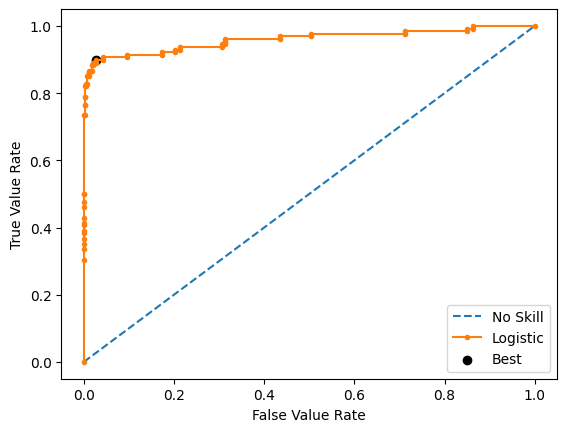

In [47]:
# Finding the threshold based on the predicted results and the true results
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# This is the best threshold
thres = thresholds[ix]

# Plotting a graph to show the threshold
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# Axis labels
pyplot.xlabel('False Value Rate')
pyplot.ylabel('True Value Rate')
pyplot.legend()

# Show the plot
pyplot.show()

In [48]:
# Loop through predicted results and convert them all to 0 or 1
boolResultArray = []
score = 0
for i in range(len(y_pred)):
    if y_pred[i] < thres:
      boolResultArray.append(0.0)
    else:
      boolResultArray.append(1.0)
print(Counter(boolResultArray))

Counter({0.0: 1242, 1.0: 149})


In [49]:
# Print a summary of the results, measured in precision, recall, f1-score, support, and accuracy
print(classification_report(y_test, boolResultArray))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1263
         1.0       0.77      0.90      0.83       128

    accuracy                           0.97      1391
   macro avg       0.88      0.94      0.91      1391
weighted avg       0.97      0.97      0.97      1391



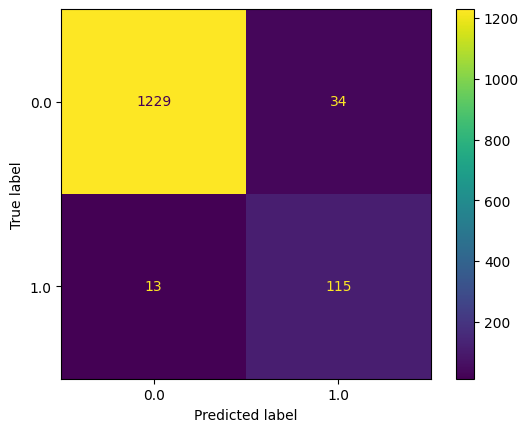

In [50]:
# Plotting a confusion matrix

# Defining the axes
classes = ([0.0, 1.0])
cm = confusion_matrix(y_test, boolResultArray)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot()

plt.show()


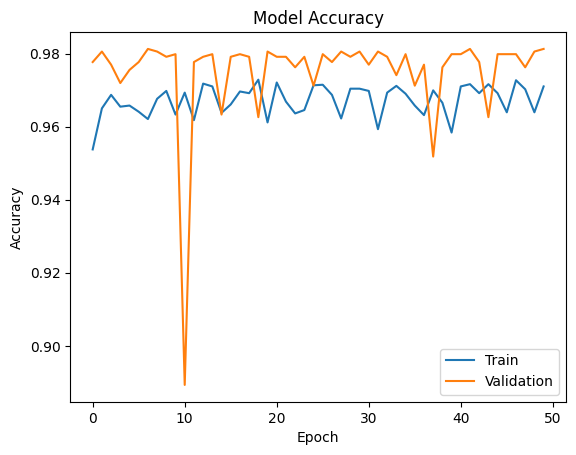

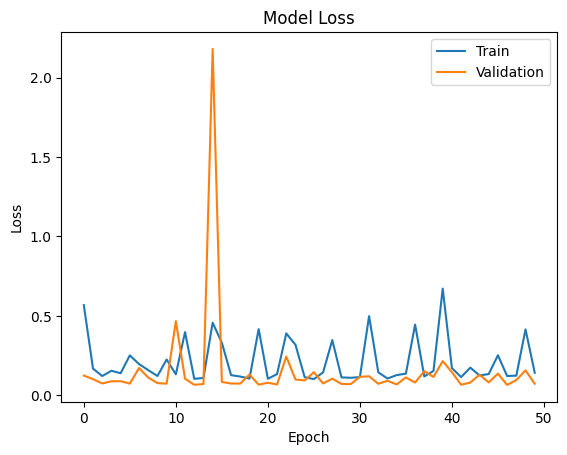

In [51]:
# Plot graphs to model training accuracy and validation accuracy as it was trained over epochs
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot graphs to model training loss and validation loss as it was trained over epochs
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
